TELECOM CHURN CASE STUDY - PRAJAY

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#setting column display to 300
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# read csv
telecom = pd.read_csv("F:/Prajay/SkypeDownloadDefault/ChromeDownloads2021/telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
# check null vals
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [6]:
# preparinf data for high valued customers
telecom_1 = telecom
telecom_1['total_rech_amt_good_phase'] = (telecom_1['total_rech_amt_6'] + telecom_1['total_rech_amt_7'])/2
telecom_1 = telecom_1[telecom_1['total_rech_amt_good_phase'] > telecom_1['total_rech_amt_good_phase'].quantile(0.70)]

telecom_1['total_usage_col'] = telecom_1['total_og_mou_9'] + telecom_1['total_ic_mou_9'] + telecom_1['vol_2g_mb_9'] + telecom_1['vol_3g_mb_9']

telecom_1['churn'] = np.where(telecom_1['total_usage_col']== 0, 1, 0)
telecom_1['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [7]:
# drop cols
telecom_1 = telecom_1.drop(['total_rech_amt_good_phase','total_usage_col'],1)

In [8]:
# dropping cols for 9th mon
nine = [col for col in telecom_1.columns if '_9' in col]
telecom_1 = telecom_1.drop(nine, axis = 1)
telecom_1 = telecom_1.drop('sep_vbc_3g', axis=1)

In [9]:
# checking the chunr rate
y = telecom_1['churn']
churn = (sum(y)/len(y.index))*100
churn

8.636045231662164

In [10]:

round(100*(telecom_1.isnull().sum()/len(telecom_1.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou

In [11]:
#delete coloum as all value are zero or constant
telecom_1 = telecom_1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [12]:
telecom_1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0
13,7002191713,492.846,20

In [13]:
# fiels for imputing 
fields_for_imputing = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g','count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

In [14]:
for field in fields_for_imputing:
    for month in ['6', '7', '8']:
        fields_for_imputing = field + '_' + month
        telecom_1 = telecom_1.drop([fields_for_imputing], 1)

In [15]:
fields_for_imputing_2 = ['date_of_last_rech']

for field in fields_for_imputing_2:
    for month in ['6', '7', '8']:
        fields_for_imputing_2 = field + '_' + month
        telecom_1[fields_for_imputing_2].fillna(telecom_1[fields_for_imputing_2].mode()[0], inplace=True)

In [16]:
# dates to 'to_datetime'
telecom_1['date_of_last_rech_6'] = pd.to_datetime(telecom_1.date_of_last_rech_6).dt.day
telecom_1['date_of_last_rech_7'] = pd.to_datetime(telecom_1.date_of_last_rech_7).dt.day
telecom_1['date_of_last_rech_8'] = pd.to_datetime(telecom_1.date_of_last_rech_8).dt.day
telecom_1[['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,27,25,26
8,25,31,30
13,20,22,30
16,30,31,14
17,30,30,25


In [17]:
# imputing missing cols with mean
missing = telecom_1.columns[telecom_1.isnull().sum()>0]
for col in missing:
    telecom_1[col].fillna((telecom_1[col].median()), inplace=True)

In [18]:
# chekcing for outliers now - by looing at the percentiles
telecom_1.describe(percentiles=[0.01, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,95.084989,96.129949,88.149189,182.428031,182.396339,170.618259,6.983204,7.104696,6.505787,1.567723,1.86379,1.714052,284.845600,285.973285,266.230021,190.036338,200.206205,172.600535,203.627289,213.913436,180.518823,2.012068,2.035893,1.790935,396.504945,417.016438,356.472052,2.266842

In [19]:
# for vals except 'churn' & 'mobile_number'
cont = [col for col in telecom_1.columns if col not in ['churn','mobile_number']]

for col in cont:
    percentiles = telecom_1[col].quantile([0.01,0.99]).values
    telecom_1[col][telecom_1[col] <= percentiles[0]] = percentiles[0]
    telecom_1[col][telecom_1[col] >= percentiles[1]] = percentiles[1]

In [20]:
# median usage 
telecom_1['median_usage'] = telecom_1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
telecom_1['median_usage'] = telecom_1.median_usage.map(lambda x: 1 if x == 0 else 0)
telecom_1.median_usage.describe()

count    29979.000000
mean         0.690950
std          0.462109
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: median_usage, dtype: float64

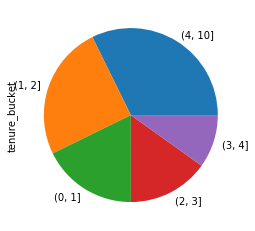

In [21]:
# creating buckets as per tenure. Interesting observation- larger the tenure, lesser the churn
telecom_1['tenure_bucket'] = np.round(telecom_1['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_1['tenure_bucket'] = pd.cut(telecom_1['tenure_bucket'], bins)
telecom_1['tenure_bucket'].value_counts().plot.pie()

In [22]:
# correlation matrixz
corr_mat= telecom_1.corr().abs()

# for upper triangle of correlation matrix
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
drop_val = [column for column in upper.columns if any(upper[column] > 0.7)]

telecom_1 = telecom_1.drop(drop_val, 1)

In [23]:
# checking 'tenure_bucket'
telecom_1['tenure_bucket'].dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [24]:
# creating dummies
telecom_1 = pd.get_dummies(telecom_1, drop_first=True)


In [25]:
telecom_1.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3","tenure_buck_(3, 4]":"tenure_buck_3_to_4","tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [26]:
# dropping cols
telecom_1 = telecom_1.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [27]:
telecom_1.shape

(29979, 68)

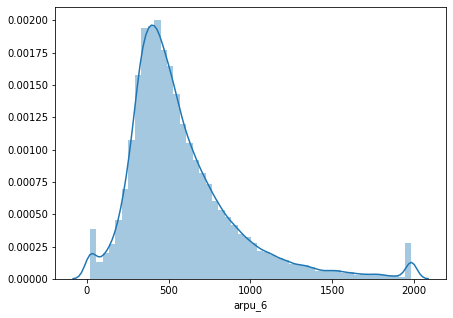

In [28]:
# checking: arpu_6
plt.figure(figsize=(7,5))
sns.distplot(telecom_1["arpu_6"], hist=True, label="Default")
plt.show()

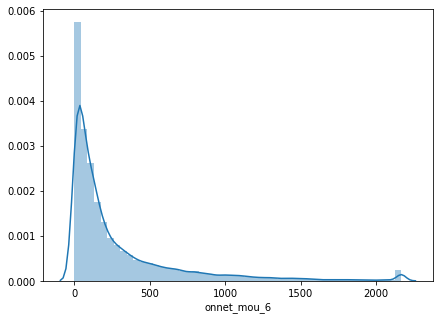

In [29]:
# checking: 'onnet_mou_6'
plt.figure(figsize=(7,5))
sns.distplot(telecom_1["onnet_mou_6"], hist=True, label="Default")
plt.show()

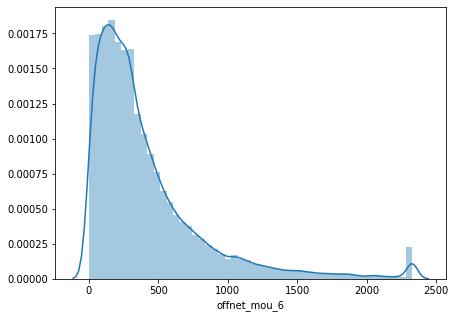

In [30]:
# checking: 'offnet_mou_6'
plt.figure(figsize=(7,5))
sns.distplot(telecom_1["offnet_mou_6"], hist=True, label="Default")
plt.show()

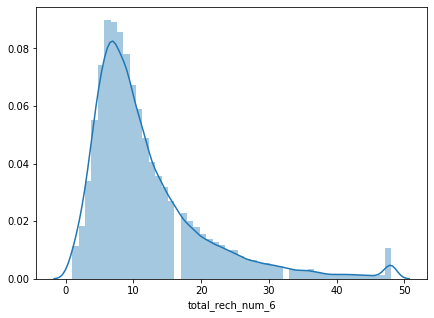

In [31]:
# checking 'total_rech_num_6'
plt.figure(figsize=(7,5))
sns.distplot(telecom_1["total_rech_num_6"], hist=True, label="Default")
plt.show()

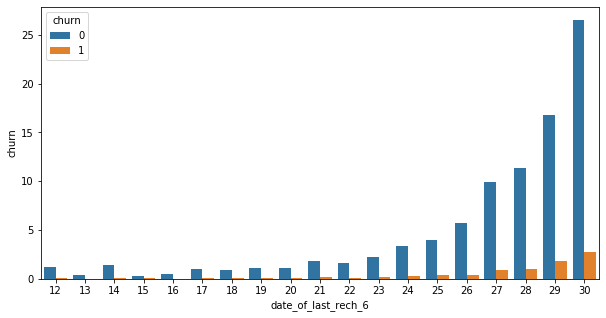

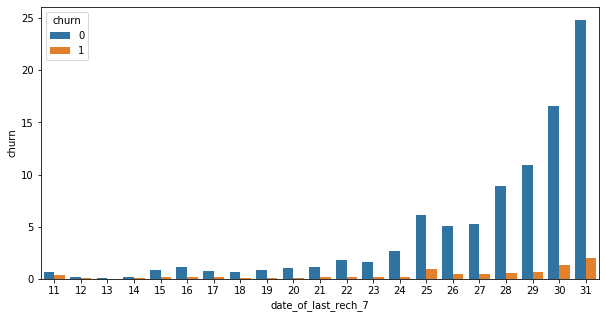

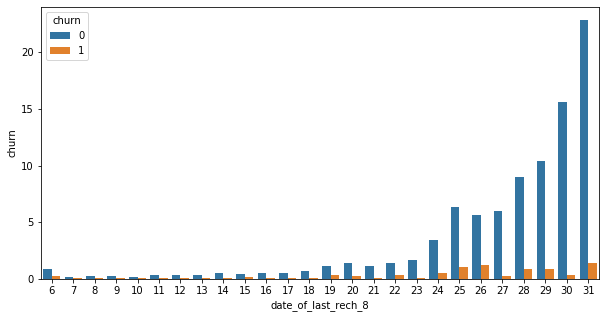

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecom_1, estimator=lambda x: len(x) / len(telecom_1) * 100)

plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecom_1, estimator=lambda x: len(x) / len(telecom_1) * 100)

plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_1, estimator=lambda x: len(x) / len(telecom_1) * 100)

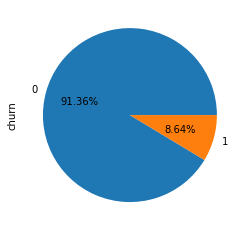

In [33]:
telecom_1["churn"].value_counts().plot.pie(autopct='%1.2f%%')

In [34]:
# model building---> splitting data for train & test sets
from sklearn.model_selection import train_test_split

# feature variable
X = telecom_1.drop(['churn','mobile_number'],axis=1)

# response variable
y = telecom_1['churn']

In [35]:
# noramolization function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize() to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,median_usage,"tenure_bucket_(1, 2]","tenure_bucket_(2, 3]","tenure_bucket_(3, 4]","tenure_bucket_(4, 10]"
7,0.534739,0.670877,1.000000,0.026693,0.194390,0.234889,0.046432,0.114358,0.109657,0.047732,0.268883,0.683540,0.0,0.0,0.000000,0.149929,0.457072,0.42849,0.0,0.063041,0.000000,0.087659,0.000000,0.092945,0.211929,0.771168,0.171040,0.051143,0.232122,0.977323,0.604889,0.449504,0.008612,0.758891,0.601189,0.703205,0.085106,0.085106,1.00,0.790,1.000000,0.833333,0.70,0.80,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.031678,1.0,0.0,1.0,0.0,0.0
8,0.183426,0.236395,0.069093,0.190915,0.040222,0.033002,0.000000,0.000000,0.000000,0.275980,0.070534,0.000000,0.0,0.0,0.247557,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.137962,0.000000,0.038112,0.056090,0.000000,0.000000,0.002507,0.056939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382979,0.425532,0.09,0.154,0.031546,0.722222,1.00,0.96,0.076336,0.000000,0.016155,0.0,0.264461,0.000024,0.0,0.0,0.5,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.011538,0.0,0.0,0.0,0.0,0.0
13,0.241494,0.091225,0.298408,0.231559,0.177150,0.049040,0.067316,0.492536,0.249916,0.046097,0.131667,0.049948,0.0,0.0,0.016965,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.064463,0.000000,0.108516,0.139182,0.024378,0.536350,0.165535,0.782194,0.000000,0.000000,0.038656,1.000000,1.000000,0.642746,0.995820,0.106383,0.063830,0.11,0.110,0.136698,0.444444,0.55,0.96,0.167939,0.073975,0.000000,0.0,0.000000,0.000016,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0
16,0.210013,0.138947,0.094510,0.023310,0.126865,0.094876,0.000000,0.009664,0.000000,0.039577,0.238094,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.040793,0.079702,0.000000,0.066072,0.220940,0.044144,0.318945,0.339976,0.047420,0.009550,0.000000,0.044121,0.000000,0.000000,0.000000,0.000000,0.191489,0.106383,0.11,0.110,0.136698,1.000000,1.00,0.32,0.152672,0.147951,0.210016,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
17,0.341812,0.000000,0.012826,0.547290,0.026033,0.000000,0.000000,0.016254,0.016670,0.036215,0.051001,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.036144,0.000000,0.000000,0.099845,0.055217,0.046183,0.000000,0.040013,0.000000,0.003249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382979,0.021277,0.11,0.000,0.031546,1.000000,0.95,0.76,0.045802,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print("# X_train dataset: ", X_train.shape)
print("# y_train dataset: ", y_train.shape)
print("# X_test dataset: ", X_test.shape)
print("# y_test dataset: ", y_test.shape)

# X_train dataset:  (20985, 66)
# y_train dataset:  (20985,)
# X_test dataset:  (8994, 66)
# y_test dataset:  (8994,)


In [37]:
# count of label 1 & 0 -- before oversampling (train)
print(sum(y_train==1))
print(sum(y_train==0))

1774
19211


In [38]:
# count of label 1 & 0 -- before oversampling (test)
print(sum(y_test==1))
print(sum(y_test==0))

815
8179


In [39]:
# performing pca 
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [40]:
print(pca.components_)

[[ 2.68081127e-02  3.06970081e-02  5.56218839e-02 ... -1.07540736e-01
  -3.70154869e-02  6.11549757e-01]
 [ 3.42672697e-02  5.09876406e-02  5.14700843e-02 ...  3.55450754e-02
   2.58790408e-02 -4.49463151e-01]
 [ 6.93277490e-03  6.92682734e-03  1.52354324e-03 ...  6.40435967e-01
   1.67142712e-01 -2.91314640e-01]
 ...
 [ 2.12489411e-01  3.36189412e-01 -2.20628843e-01 ... -3.73032683e-03
  -5.39821536e-03 -5.81354928e-03]
 [ 6.56803160e-02  1.68613424e-01 -4.13171345e-02 ...  4.17709310e-03
   7.39631645e-04  8.34961611e-05]
 [-5.90097151e-01  4.29989222e-01  2.05092328e-02 ... -7.39096132e-04
   3.63184457e-03  3.98307422e-03]]


In [41]:
col_names = list(X_train.columns)

In [42]:
pc_df = pd.DataFrame({'PC_ONE':pca.components_[0],
                       'PC_TWO':pca.components_[1], 
                       'PC_THREE':pca.components_[2],
                       'PC_FOUR':pca.components_[3],
                       'PC_FIVE':pca.components_[4],
                       'PC_SIX':pca.components_[5],
                       'PC_SEVEN':pca.components_[6],
                       'PC_EIGHT':pca.components_[7],
                       'PC_NINE':pca.components_[8],
                       'PC_TEN':pca.components_[9],
                       'Feature':col_names})
pc_df.head(10)

,PC_ONE,PC_TWO,PC_THREE,PC_FOUR,PC_FIVE,PC_SIX,PC_SEVEN,PC_EIGHT,PC_NINE,PC_TEN,Feature
0,0.026808,0.034267,0.006933,-0.038286,0.335721,0.044744,0.031759,-0.077434,0.002045,-0.154952,arpu_6
1,0.030697,0.050988,0.006927,-0.032641,0.348655,0.045468,-0.062891,-0.083313,-0.216119,0.064745,arpu_7
2,0.055622,0.051470,0.001524,-0.021637,0.348079,0.049049,-0.063628,-0.083386,-0.242180,0.125894,arpu_8
3,-0.067611,-0.028013,0.016473,-0.068362,0.116832,0.018759,-0.049425,-0.004988,-0.047719,-0.102740,onnet_mou_6
4,-0.035821,-0.035030,0.001642,-0.053329,0.305351,0.029616,0.165881,-0.047175,0.011259,-0.156145,offnet_mou_6
5,-0.038662,-0.028193,0.000487,-0.050368,0.297391,0.031108,0.092964,-0.041346,-0.150339,-0.001458,offnet_mou_7
6,0.005966,-0.003237,-0.000825,0.031120,0.037734,0.007171,-0.042184,-0.033041,-0.129431,0.112087,roam_ic_mou_6
7,0.004517,-0.002584,0.001197,0.034910,0.042491,0.007955,-0.025452,-0.033504,-0.094920,0.091725,roam_ic_mou_7
8,0.006602,0.002101,0.001493,0.026789,0.055908,0.005889,-0.018482,-0.030491,-0.092687,0.092846,roam_ic_mou_8
9,0.027621,-0.015782,-0.001901,-0.029167,0.098005,0.012437,0.069372,-0.014781,0.126391,-0.143194,loc_og_t2t_mou_6


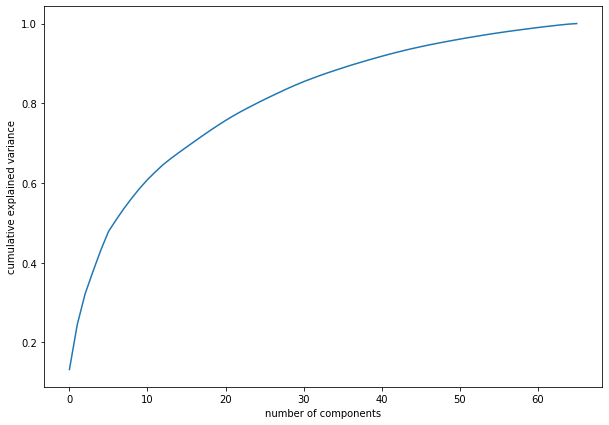

In [43]:
# drawing curve

%matplotlib inline
fig = plt.figure(figsize = (10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- 40 components express 90% variance 

In [44]:
from sklearn.decomposition import IncrementalPCA
pc_final = IncrementalPCA(n_components=40)

df_train_pca = pc_final.fit_transform(X_train)

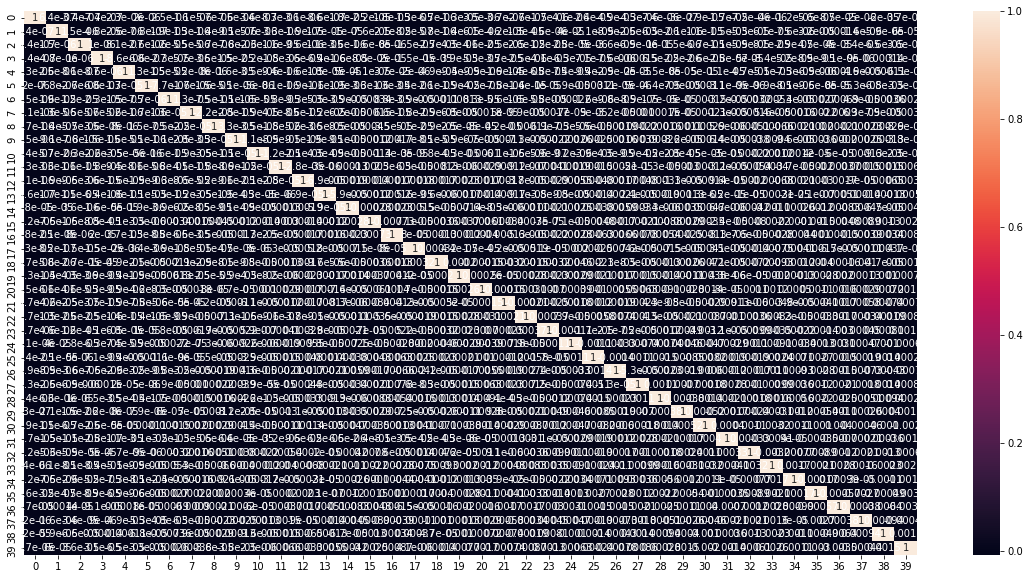

In [45]:
# correlation matrix
corr_mat = np.corrcoef(df_train_pca.transpose())

# plot matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat,annot = True)

- we observe almost all variable are no-correlation with each other

In [46]:
# apllyin selective components to test data
df_test_pca = pc_final.transform(X_test)
df_test_pca.shape

(8994, 40)

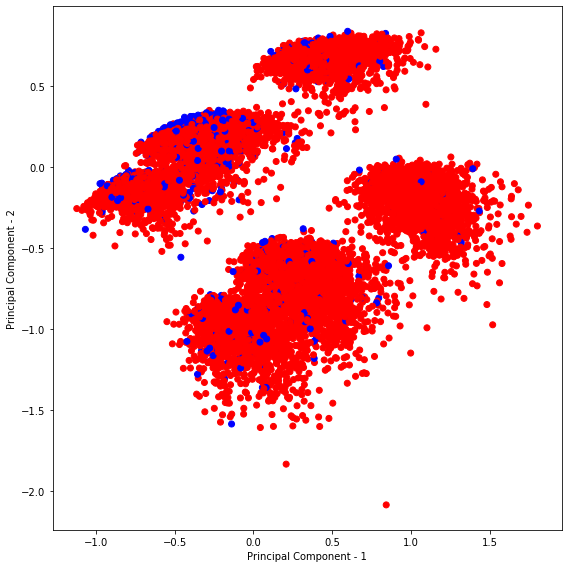

In [47]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'red',1:'blue'}))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.tight_layout()
plt.show()

In [48]:
# now we are training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

learn_pca = LogisticRegression(class_weight='balanced')
model_pca = learn_pca.fit(df_train_pca,y_train)

In [49]:
pred_test = model_pca.predict_proba(df_test_pca)[:,1]
metrics.roc_auc_score(y_test, pred_test)

0.8670283090692383

In [50]:
p_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [51]:
# importing libs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
# confusion matrix
confusion_matrix(y_test,y_pred_default)

array([[6646, 1533],
       [ 163,  652]], dtype=int64)

In [53]:
# accruracy score
accuracy_score(y_test,y_pred_default)

0.8114298421169669

In [54]:
# y_pred to df 
y_pred_df = pd.DataFrame(p_test)

# to df col
y_pred_1 = y_pred_df.iloc[:,[1]]

# formatting
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# renamaing col to churn_probability
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_probability'})
y_pred_final.head()

,churn,churn_probability
0,0,0.052424
1,0,0.163766
2,0,0.159663
3,0,0.341359
4,0,0.541406


In [55]:
# ROC score
fpr, tpr, thresholds = roc_curve(y_pred_final.churn, y_pred_final.churn_probability)
roc_auc = auc(fpr, tpr)
roc_auc

0.8670283090692383

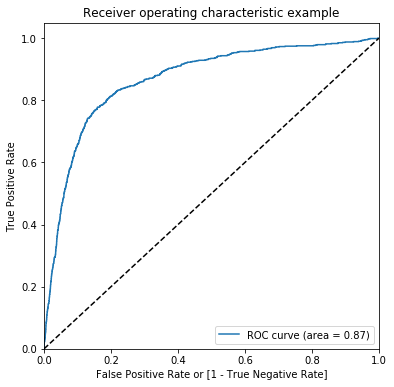

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99573668e+00, 9.95736681e-01, 9.93966349e-01, ...,
        1.26277203e-04, 3.52022771e-05, 1.99394678e-05]))

In [56]:
# draw ROC curve
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_pred_final.churn, y_pred_final.churn_probability)

In [57]:
# columns with diff probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_probability.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.052424,1,0,0,0,0,0,0,0,0,0
1,0,0.163766,1,1,0,0,0,0,0,0,0,0
2,0,0.159663,1,1,0,0,0,0,0,0,0,0
3,0,0.341359,1,1,1,1,0,0,0,0,0,0
4,0,0.541406,1,1,1,1,1,1,0,0,0,0


In [58]:
# calc accuracy/ specificity/ sensitivity for above cutoffs
cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.090616,0.000000,1.000000
0.1,0.1,0.325550,0.260912,0.974233
0.2,0.2,0.501890,0.457880,0.943558
0.3,0.3,0.635201,0.608143,0.906748
0.4,0.4,0.737936,0.726739,0.850307
0.5,0.5,0.811430,0.812569,0.800000
0.6,0.6,0.862241,0.875779,0.726380
0.7,0.7,0.887036,0.914659,0.609816
0.8,0.8,0.904047,0.950727,0.435583
0.9,0.9,0.910051,0.978971,0.218405


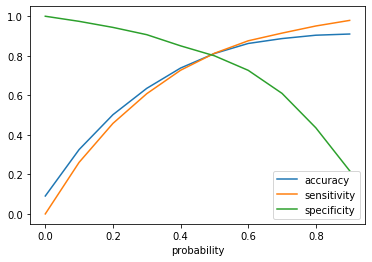

In [59]:
# plotting the curve for the above table
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [79]:
# for optimal cutoff
import sys
def findOptimalCutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf':pd.Series(tpr-(1-fpr),index=i), 
                        'threshold':pd.Series(threshold,index=i)})
    roc_1 = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_1['threshold'])

In [80]:
# for optimal probability threshold
threshold = findOptimalCutoff(y_pred_final.churn, y_pred_final.churn_probability)
threshold

[0.49194794024857297]

In [81]:
# new col 'predicted_churn' with 1 --> if churn_probability > 0.492 
y_pred_final['predicted_churn'] = y_pred_final.churn_probability.map( lambda x: 1 if x > 0.492 else 0)
print(y_pred_final.churn.value_counts())
print(y_pred_final.predicted_churn.value_counts())

0    8179
1     815
Name: churn, dtype: int64
0    6758
1    2236
Name: predicted_churn, dtype: int64


In [82]:
# confusion matirx
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted_churn )
confusion

array([[6600, 1579],
       [ 158,  657]], dtype=int64)

In [83]:
# logistic reg 

TP = confusion[1,1] 
TN = confusion[0,0] 
FN = confusion[1,0] 
FP = confusion[0,1] 


In [84]:
print('accuracy Score of test data: ', accuracy_score(y_test,y_pred_default))

accuracy Score of test data:  0.8114298421169669


In [86]:
print('sensitivity: ', TP / float(TP+FN))

sensitivity:  0.8061349693251534


In [87]:
print('Specificity: ', TN / float(TN+FP))

Specificity:  0.8069446142560215


In [88]:
print('False Postive Rate: ', FP/ float(TN+FP))

False Postive Rate:  0.19305538574397849


In [89]:
print('positive predictive value: ', TP / float(TP+FP))

positive predictive value:  0.2938282647584973


In [90]:
print('Negative predictive value: ', TN / float(TN+ FN))

Negative predictive value:  0.9766203018644569


In [91]:
print('Misclassification Rate: ', (FN+FP)/(TP+TN+FP+FN))

Misclassification Rate:  0.19312875250166778


In [95]:
# LogistcRegression model with RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             
rfe = rfe.fit(X_norm,y)

print(rfe.support_)          
print(rfe.ranking_)           

[ True  True  True False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False  True False False  True False
 False False False False False  True False  True False False False False
 False False False False False False]
[ 1  1  1 21 20 57 30 18  1  6  1  3 43 44 31 33 17  9 19 54 32  7 53 36
 56 13 39 40 38 52 26  1 12 55 48  8 47 46 22  4 37 35 10  1 34 14  1 24
 49  5 28 23 50  1 27  1 51 45 16 15  2 29 41 42 25 11]


In [96]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'std_ic_t2f_mou_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8'],
      dtype='object')

In [97]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

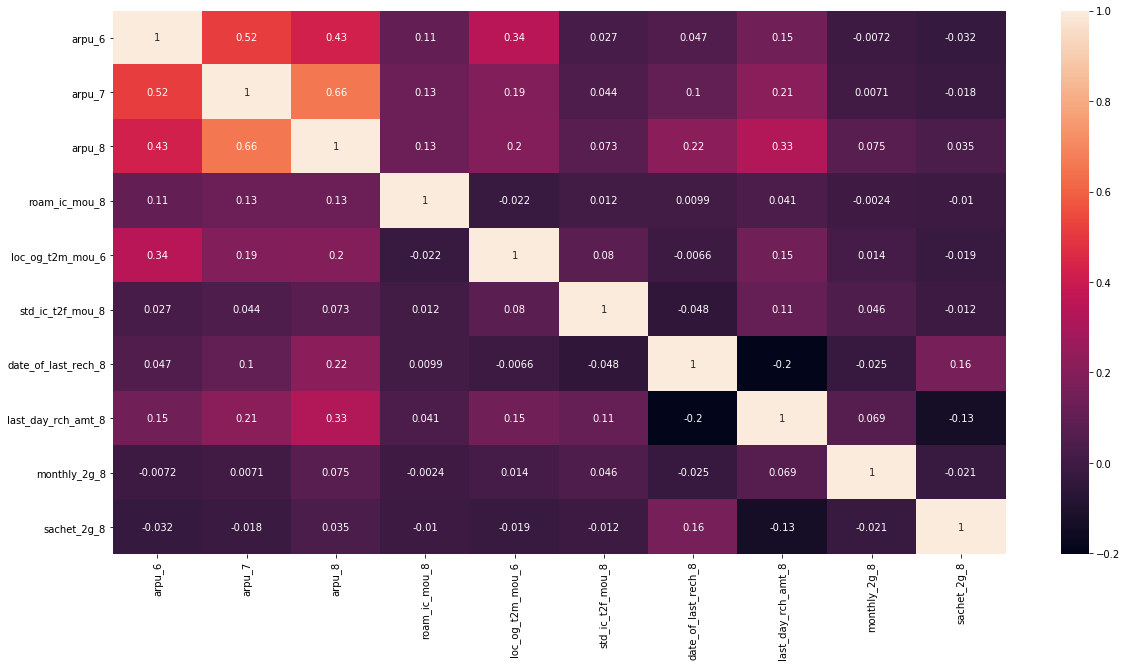

In [98]:
#corr matrxi
plt.figure(figsize = (20,10))        
sns.heatmap(X_norm[col].corr(),annot = True)

In [99]:
# checking fo rvif value
vif_col = list(col)
vif_col.append('churn')
vif_cal(input_data=telecom_1[vif_col], dependent_col='churn')

,Var,Vif
1,arpu_7,7.78
2,arpu_8,6.00
0,arpu_6,5.84
6,date_of_last_rech_8,5.12
4,loc_og_t2m_mou_6,1.96
7,last_day_rch_amt_8,1.92
9,sachet_2g_8,1.19
8,monthly_2g_8,1.12
3,roam_ic_mou_8,1.10
5,std_ic_t2f_mou_8,1.10


In [100]:
# VIFs seem ok.. all under 10

In [101]:
# runnign the models w/ selective vars
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [102]:
# mkaing pred on test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
metrics.roc_auc_score(y_test, pred_probs_test)

0.8637213213249253

In [104]:
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [107]:
# classinfacation report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8179
           1       0.30      0.81      0.44       815

    accuracy                           0.81      8994
   macro avg       0.64      0.81      0.66      8994
weighted avg       0.92      0.81      0.85      8994



In [108]:
# confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[6628 1551]
 [ 156  659]]


In [109]:
# accuracy scorew
print(accuracy_score(y_test,y_pred_default))

0.8102068045363575


In [112]:
y_pred_df = pd.DataFrame(pred_test)
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_probability'})
y_pred_final.head()

,churn,churn_probability
0,0,0.039945
1,0,0.149074
2,0,0.170126
3,0,0.234382
4,0,0.495612


In [114]:
# ROC score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_probability)
roc_score = auc(fpr, tpr)
roc_score

0.8637213213249253

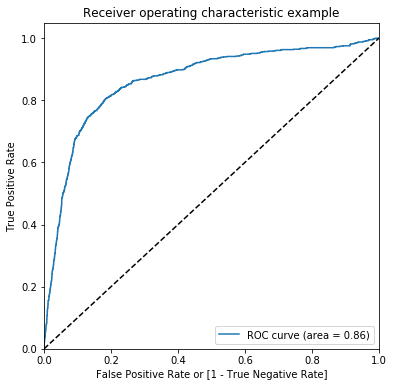

(array([0.00000000e+00, 1.22264335e-04, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99835111e+00, 9.98351112e-01, 9.96216769e-01, ...,
        5.30511611e-05, 1.11204804e-05, 8.74655299e-06]))

In [116]:
# drawing the curve
draw_roc(y_pred_final.churn, y_pred_final.churn_probability)

In [118]:
# cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_probability.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.039945,1,0,0,0,0,0,0,0,0,0
1,0,0.149074,1,1,0,0,0,0,0,0,0,0
2,0,0.170126,1,1,0,0,0,0,0,0,0,0
3,0,0.234382,1,1,1,0,0,0,0,0,0,0
4,0,0.495612,1,1,1,1,1,0,0,0,0,0


In [119]:
cutoff_df = pd.DataFrame( columns = ['probabilty','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,probabilty,accuracy,sensitivity,specificity
0.0,0.0,0.090616,0.978971,0.218405
0.1,0.1,0.291972,0.978971,0.218405
0.2,0.2,0.454748,0.978971,0.218405
0.3,0.3,0.603402,0.978971,0.218405
0.4,0.4,0.727819,0.978971,0.218405
0.5,0.5,0.810207,0.978971,0.218405
0.6,0.6,0.862130,0.978971,0.218405
0.7,0.7,0.890038,0.978971,0.218405
0.8,0.8,0.904381,0.978971,0.218405
0.9,0.9,0.910607,0.978971,0.218405


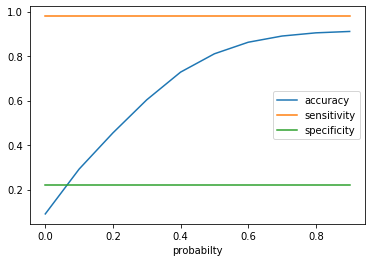

In [120]:
# plot cutoff
cutoff_df.plot.line(x='probabilty', y=['accuracy','sensitivity','specificity'])

In [121]:
## Finidng the optimal cutoff
def findOptimalCutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_1 = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_1['threshold'])

In [124]:
# Find optimal probability threshold
threshold = findOptimalCutoff(y_pred_final.churn,y_pred_final.churn_probability)
threshold

[0.4984618044978295]

In [125]:
# new col 'predicted_churn' with 1 --> if churn_probability > 0.492 
y_pred_final['predicted_churn'] = y_pred_final.churn_probability.map( lambda x: 1 if x > 0.492 else 0)
print(y_pred_final.churn.value_counts())
print(y_pred_final.predicted_churn.value_counts())

0    8179
1     815
Name: churn, dtype: int64
0    6737
1    2257
Name: predicted_churn, dtype: int64


In [127]:
# confision matrix
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted_churn )
confusion

array([[6584, 1595],
       [ 153,  662]], dtype=int64)

In [128]:
print('accuracy: ', accuracy_score(y_test,y_pred_default))

accuracy Score of test data:  0.8102068045363575


In [129]:
print('Sensitivity: ', TP / float(TP+FN))

Sensitivity:  0.8061349693251534


In [130]:
print('Specificity: ',TN / float(TN+FP))

Specificity:  0.8069446142560215


In [133]:
print('False Postive Rate: ',FP/ float(TN+FP))


False Postive Rate:  0.19305538574397849


In [134]:
print('Positive Predictive Value: ', TP / float(TP+FP))

Positive Predictive Value:  0.2938282647584973


In [135]:
print('Negative Predictive Value: ',TN / float(TN+ FN))

Negative Predictive Value:  0.9766203018644569


In [137]:
# DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier


In [138]:
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [139]:
y_pred_default = dt_default.predict(df_test_pca)

In [140]:
# CLASSIFICATION REPROT
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      8179
           1       0.23      0.61      0.34       815

    accuracy                           0.78      8994
   macro avg       0.59      0.70      0.60      8994
weighted avg       0.89      0.78      0.82      8994



In [141]:
# confusion report
print(confusion_matrix(y_test,y_pred_default))

[[6530 1649]
 [ 317  498]]


In [142]:
# acccuracy score
print(accuracy_score(y_test,y_pred_default))

0.7814098287747387


In [144]:
print('accuracy: ', accuracy_score(y_test,y_pred_default))

accuracy:  0.7814098287747387


In [145]:
print('Sensitivity: ', TP / float(TP+FN))

Sensitivity:  0.8061349693251534


In [146]:
print('Specificity: ',TN / float(TN+FP))

Specificity:  0.8069446142560215


In [147]:
print('False Postive Rate: ',FP/ float(TN+FP))

False Postive Rate:  0.19305538574397849


In [148]:
print('Positive Predictive Value: ', TP / float(TP+FP))

Positive Predictive Value:  0.2938282647584973


In [149]:
print('Positive Predictive Value: ', TP / float(TP+FP))

Positive Predictive Value:  0.2938282647584973


In [150]:
print('Negative Predictive Value: ',TN / float(TN+ FN))

Negative Predictive Value:  0.9766203018644569


In [151]:
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Misclassification Rate:  0.19312875250166778


In [152]:
# Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [157]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters 
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [158]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.107000,0.009611,0.001207,0.000400,1,{'max_depth': 1},0.751489,0.745533,0.664522,0.636407,0.547296,0.669049,0.075572,39,0.742792,0.744341,0.676733,0.642602,0.543126,0.669919,0.074456
1,0.188946,0.003425,0.001204,0.000402,2,{'max_depth': 2},0.751489,0.562306,0.830117,0.811532,0.780796,0.747248,0.096277,33,0.742792,0.557898,0.827794,0.814391,0.777341,0.744043,0.097697
2,0.267054,0.002816,0.001209,0.000394,3,{'max_depth': 3},0.695973,0.732904,0.709078,0.619014,0.711222,0.693638,0.039150,38,0.702109,0.733024,0.710329,0.628723,0.714975,0.697832,0.036008
3,0.348206,0.012738,0.001803,0.000399,4,{'max_depth': 4},0.736478,0.764117,0.702168,0.686681,0.680724,0.714034,0.031656,37,0.743209,0.759114,0.716702,0.693055,0.682690,0.718954,0.028955
4,0.412105,0.001694,0.001602,0.000492,5,{'max_depth': 5},0.750774,0.731951,0.717179,0.732190,0.776745,0.741768,0.020481,35,0.756254,0.740410,0.729747,0.747915,0.789195,0.752704,0.020225


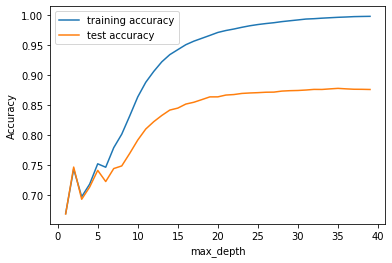

In [159]:
# plot accuracy with max depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [160]:
# tuning min sample leaf
parameters = {'min_samples_leaf': range(5, 200, 20)}
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [161]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.795126,0.024001,0.001800,0.000400,5,{'min_samples_leaf': 5},0.835120,0.827734,0.835120,0.836073,0.847987,0.836407,0.006523,1,0.937872,0.935728,0.940791,0.941268,0.939242,0.938980,0.002019
1,0.730811,0.052577,0.001401,0.000802,25,{'min_samples_leaf': 25},0.766500,0.771503,0.758399,0.758161,0.768168,0.764546,0.005365,2,0.821777,0.832738,0.821063,0.818382,0.824934,0.823779,0.004942
2,0.650477,0.012105,0.001599,0.000488,45,{'min_samples_leaf': 45},0.738385,0.719323,0.735525,0.734096,0.750298,0.735525,0.009909,3,0.792292,0.761258,0.776447,0.775018,0.789135,0.778830,0.011103
3,0.646430,0.069462,0.001586,0.000511,65,{'min_samples_leaf': 65},0.739338,0.700262,0.732428,0.751489,0.723136,0.729330,0.017228,4,0.780975,0.744222,0.766738,0.782940,0.761496,0.767274,0.014129
4,0.606828,0.025875,0.001602,0.000489,85,{'min_samples_leaf': 85},0.739099,0.687634,0.732428,0.733381,0.724803,0.723469,0.018486,5,0.770074,0.729628,0.766083,0.769359,0.750477,0.757124,0.015478


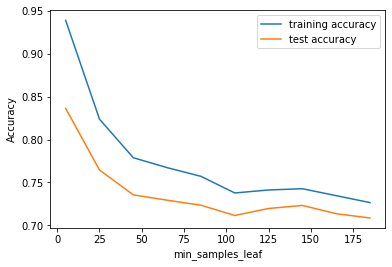

In [163]:
# plot accuraciews with min sample leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [164]:
# min_samples_split
parameters = {'min_samples_split': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [165]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.981870,0.119719,0.002002,3.162980e-07,5,{'min_samples_split': 5},0.870384,0.870622,0.869192,0.876102,0.883488,0.873958,0.005330,1,0.994460,0.994520,0.993924,0.993626,0.995116,0.994329,0.000516
1,0.880136,0.021875,0.002006,1.542139e-05,25,{'min_samples_split': 25},0.825113,0.822492,0.819395,0.836550,0.822731,0.825256,0.005932,2,0.929354,0.931677,0.926376,0.927984,0.923934,0.927865,0.002624
2,0.885885,0.080627,0.001986,2.680207e-05,45,{'min_samples_split': 45},0.790803,0.790326,0.794139,0.798666,0.790088,0.792804,0.003276,3,0.881284,0.878604,0.878723,0.883846,0.881284,0.880748,0.001943
3,0.871833,0.079737,0.002004,1.568454e-05,65,{'min_samples_split': 65},0.767929,0.773410,0.762688,0.781987,0.769836,0.771170,0.006423,4,0.847868,0.845544,0.840958,0.850905,0.851918,0.847439,0.003946
4,0.855365,0.045853,0.001987,3.021116e-05,85,{'min_samples_split': 85},0.750298,0.760543,0.756254,0.767453,0.755540,0.758018,0.005731,5,0.823267,0.826185,0.821003,0.830891,0.829104,0.826090,0.003633


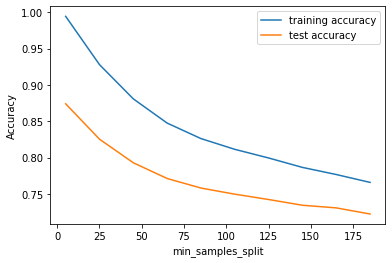

In [166]:
plt.figure()
plt.plot(score["param_min_samples_split"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_split"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [167]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           refit='recall_score',
                          cv = n_folds, 
                           verbose = 1, 
                           n_jobs = -1,
                           return_train_score = True
                          )

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', return_train_score=True, verbose=1)

In [168]:
# cv_results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.122162,0.090957,0.002706,0.000400,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.70193,0.779604,0.674768,0.768644,0.705266,0.726042,0.040807,235,0.71569,0.792828,0.692161,0.782464,0.720932,0.740815,0.039582
1,1.208340,0.082356,0.002202,0.000403,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.70193,0.779604,0.674768,0.768644,0.705266,0.726042,0.040807,235,0.71569,0.792828,0.692161,0.782464,0.720932,0.740815,0.039582
2,1.342590,0.187388,0.002355,0.000703,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.70193,0.779604,0.674768,0.768644,0.705266,0.726042,0.040807,235,0.71569,0.792828,0.692161,0.782464,0.720932,0.740815,0.039582
3,1.232806,0.138806,0.002034,0.000066,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.70193,0.779604,0.674768,0.768644,0.705266,0.726042,0.040807,235,0.71569,0.792828,0.692161,0.782464,0.720932,0.740815,0.039582
4,1.133049,0.013899,0.002220,0.000392,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.70193,0.779604,0.674768,0.766500,0.705266,0.725614,0.040366,255,0.71569,0.792828,0.692161,0.780200,0.720932,0.740362,0.039114


In [170]:
# for optimal accuracy score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.7804145818441743
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [171]:
# now to model with opt hyper-parameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [172]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6600, 1579],
       [ 355,  460]], dtype=int64)

In [225]:
TP = confusion_tree_hyper[1,1] 
TN = confusion_tree_hyper[0,0] 
FP = confusion_tree_hyper[0,1] 
FN = confusion_tree_hyper[1,0] 

In [226]:
print('Sensitivity: ', TP / float(TP+FN))

Sensitivity:  0.5644171779141104


In [227]:
print('Specificity: ',TN / float(TN+FP))

Specificity:  0.8069446142560215


In [228]:
print('False Postive Rate: ',FP/ float(TN+FP))

False Postive Rate:  0.19305538574397849


In [229]:
print('Positive Predictive Value: ', TP / float(TP+FP))

Positive Predictive Value:  0.22560078469838157


In [230]:
print('Negative Predictive Value: ',TN / float(TN+ FN))

Negative Predictive Value:  0.9489575844716032


In [231]:
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Misclassification Rate:  0.21503224371803425


In [179]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

#pred
y_pred_default = rfc.predict(df_test_pca)


In [180]:
# comfusion matrix random forest
confusion_rf = confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8146,   33],
       [ 759,   56]], dtype=int64)

In [182]:
TN = confusion_rf[0,0] 
TP = confusion_rf[1,1] 
FP = confusion_rf[0,1] 
FN = confusion_rf[1,0] 

In [183]:
print('Sensitivity: ', TP / float(TP+FN))

Sensitivity:  0.0687116564417178


In [184]:
print('Specificity: ',TN / float(TN+FP))

Specificity:  0.99596527692872


In [185]:
print('False Postive Rate: ',FP/ float(TN+FP))

False Postive Rate:  0.004034723071280107


In [186]:
print('Positive Predictive Value: ', TP / float(TP+FP))

Positive Predictive Value:  0.6292134831460674


In [187]:
print('Negative Predictive Value: ',TN / float(TN+ FN))

Negative Predictive Value:  0.9147669848399775


In [188]:
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Misclassification Rate:  0.08805870580386925


In [189]:
# hyper parameter tuning for Radnom forest
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score = True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [190]:
score = rf_with_pca.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.769729,0.154074,0.070537,0.008237,2,{'max_depth': 2},0.752919,0.764832,0.762926,0.754110,0.763164,0.759590,0.005018,4,0.774303,0.772159,0.765189,0.752978,0.758816,0.764689,0.008001
1,9.893071,0.194329,0.110091,0.020610,7,{'max_depth': 7},0.873719,0.871337,0.885394,0.870384,0.881582,0.876483,0.005945,3,0.900226,0.902966,0.902490,0.898856,0.905468,0.902001,0.002290
2,13.179210,0.524278,0.106766,0.007588,12,{'max_depth': 12},0.909936,0.913986,0.921134,0.917084,0.915416,0.915511,0.003675,2,0.978973,0.978139,0.980403,0.977603,0.979867,0.978997,0.001040
3,12.608301,0.585283,0.106744,0.021066,17,{'max_depth': 17},0.915416,0.919228,0.918275,0.921372,0.920419,0.918942,0.002052,1,0.994877,0.995056,0.994579,0.993329,0.994222,0.994413,0.000611


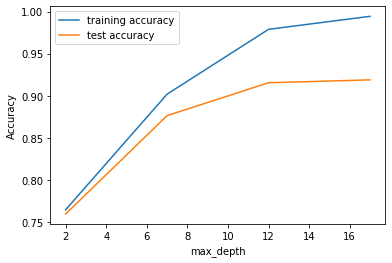

In [191]:
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [193]:
# n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [194]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.548460,0.027668,0.098588,0.002045,100,{'n_estimators': 100},0.902788,0.906362,0.915654,0.909459,0.913271,0.909507,0.004626,4,0.960031,0.960567,0.961520,0.958601,0.961520,0.960448,0.001086
1,54.457212,0.526209,0.471940,0.012659,500,{'n_estimators': 500},0.902788,0.906123,0.915416,0.910889,0.914463,0.909936,0.004839,3,0.962235,0.961520,0.962533,0.958542,0.962354,0.961437,0.001488
2,99.271437,2.472283,0.860743,0.040332,900,{'n_estimators': 900},0.903741,0.907315,0.917084,0.912318,0.913033,0.910698,0.004663,1,0.962175,0.961878,0.962533,0.959435,0.962771,0.961758,0.001201
3,135.200278,17.091889,1.143279,0.338388,1300,{'n_estimators': 1300},0.903503,0.905409,0.916607,0.912080,0.913748,0.910269,0.004999,2,0.963009,0.963128,0.962414,0.959257,0.962533,0.962068,0.001432


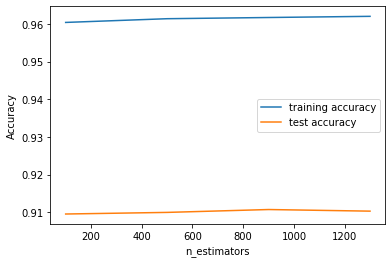

In [195]:
#ploptting
plt.figure()
plt.plot(score["param_n_estimators"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_n_estimators"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [196]:
# for  max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [197]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.423989,0.042587,0.104124,0.005894,4,{'max_features': 4},0.902311,0.906123,0.915654,0.910412,0.910650,0.909030,0.004517,1,0.959971,0.958006,0.961401,0.957946,0.961937,0.959852,0.001661
1,14.286353,0.185725,0.102637,0.006874,8,{'max_features': 8},0.904217,0.906600,0.913986,0.908744,0.911604,0.909030,0.003474,1,0.960805,0.960984,0.959376,0.959137,0.959435,0.959948,0.000782
2,23.703308,0.207094,0.094404,0.000759,14,{'max_features': 14},0.899929,0.901120,0.913271,0.908268,0.909459,0.906409,0.005096,3,0.962533,0.961639,0.962175,0.958065,0.960567,0.960996,0.001609
3,33.355347,0.183946,0.093632,0.001276,20,{'max_features': 20},0.898737,0.898975,0.910650,0.908268,0.907791,0.904884,0.005017,5,0.959435,0.962175,0.961818,0.959197,0.960031,0.960531,0.001232
4,36.620648,3.204296,0.083734,0.013203,24,{'max_features': 24},0.899214,0.901120,0.911365,0.909221,0.905647,0.905313,0.004622,4,0.960269,0.960984,0.961758,0.958065,0.960746,0.960365,0.001246


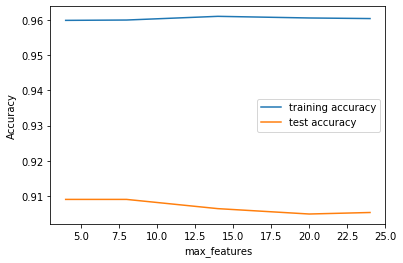

In [198]:
plt.figure()
plt.plot(score["param_max_features"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_features"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [202]:
# for min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [203]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.540174,0.043266,0.087224,0.001184,100,{'min_samples_leaf': 100},0.856088,0.844889,0.858232,0.850369,0.854658,0.852847,0.004738,1,0.874136,0.868716,0.870145,0.868775,0.872528,0.870860,0.002143
1,7.967462,0.054486,0.083981,0.001792,150,{'min_samples_leaf': 150},0.837265,0.837741,0.846081,0.839886,0.841077,0.840410,0.003159,2,0.852514,0.852692,0.854420,0.851144,0.854182,0.852990,0.001199
2,7.432333,0.040737,0.079484,0.001552,200,{'min_samples_leaf': 200},0.827258,0.823207,0.827496,0.824398,0.827258,0.825923,0.001774,3,0.841137,0.839647,0.836907,0.836490,0.837801,0.838396,0.001748
3,7.010698,0.038573,0.079088,0.001485,250,{'min_samples_leaf': 250},0.818203,0.808196,0.826305,0.820586,0.822492,0.819157,0.006088,4,0.830593,0.826721,0.829462,0.827794,0.829283,0.828771,0.001358
4,6.656046,0.040384,0.076946,0.001832,300,{'min_samples_leaf': 300},0.812247,0.812962,0.814391,0.808196,0.812962,0.812152,0.002097,5,0.827913,0.827079,0.819335,0.819097,0.820288,0.822742,0.003910


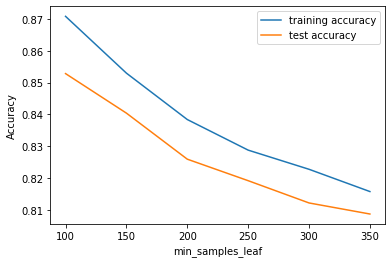

In [204]:
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [205]:
# for optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [206]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.066554,0.117924,0.066384,0.003727,200,{'min_samples_split': 200},0.873005,0.870860,0.883726,0.872051,0.883726,0.876674,0.005798,1,0.902788,0.901120,0.902966,0.899273,0.906183,0.902466,0.002288
1,6.596259,0.129431,0.065401,0.006369,250,{'min_samples_split': 250},0.863950,0.860376,0.872051,0.865380,0.870622,0.866476,0.004314,2,0.890398,0.889445,0.889624,0.888134,0.890338,0.889588,0.000819
2,6.389175,0.155348,0.062971,0.002586,300,{'min_samples_split': 300},0.859423,0.854658,0.865380,0.859423,0.864665,0.860710,0.003934,3,0.881463,0.881880,0.879676,0.878782,0.881582,0.880677,0.001223
3,6.273673,0.076582,0.057804,0.002217,350,{'min_samples_split': 350},0.851084,0.846081,0.855373,0.847510,0.854896,0.850989,0.003760,4,0.870503,0.869550,0.868537,0.866095,0.871694,0.869276,0.001902
4,5.944934,0.101512,0.058996,0.003120,400,{'min_samples_split': 400},0.845366,0.837741,0.852990,0.841553,0.851084,0.845747,0.005706,5,0.864963,0.862342,0.859245,0.860734,0.867941,0.863045,0.003096


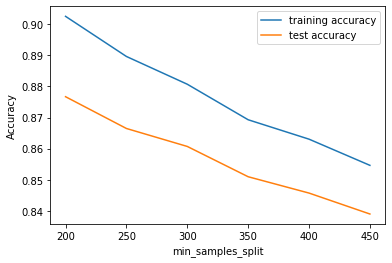

In [207]:
# now plotting 200 to 300
plt.figure()
plt.plot(score["param_min_samples_split"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_split"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [208]:
# patam grids by result of ransom search
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# base model
rf = RandomForestClassifier(class_weight='balanced')

# instantiating
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [209]:
# fit grid search
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [210]:
# accuracy
grid_search.best_score_

0.8519418632356445

In [211]:
# params
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [212]:
# modeling along with teh best hyperparams
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                              max_features=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=300)

In [213]:
# fitting
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [214]:
# to predicting
y_pred_default = rfc.predict(df_test_pca)

In [215]:
# conf matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7128, 1051],
       [ 267,  548]], dtype=int64)

In [216]:
TN = confusion_rf_hyper[0,0] 
TP = confusion_rf_hyper[1,1]
FP = confusion_rf_hyper[0,1] 
FN = confusion_rf_hyper[1,0] 

In [217]:
# accuracy score
accuracy_score(y_test,y_pred_default)

0.8534578607960863

In [218]:
# sesitivity 
TP / float(TP+FN)

0.6723926380368098

In [219]:
# specificity
TN / float(TN+FP)

0.8715001833965033

In [220]:
# false pos rate
FP/ float(TN+FP)

0.12849981660349677

In [222]:
# postiive predictive rate
TP / float(TP+FP)

0.342714196372733

In [223]:
# neg preditcive rate
TN / float(TN+ FN)

0.963894523326572

In [224]:
# missclassification rate
(FN+FP)/(TP+TN+FP+FN)

0.1465421392039137

In [234]:
# RandomForestClassifier with pca

In [235]:
# importing
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fitting
rfc.fit(df_train_pca,y_train)

# making predictions
y_pred_default = rfc.predict(df_test_pca)

In [236]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8150,   29],
       [ 759,   56]], dtype=int64)

In [237]:
TN = confusion_rf[0,0] 
TP = confusion_rf[1,1]
FP = confusion_rf[0,1]
FN = confusion_rf[1,0]

In [238]:
# specificity
TN / float(TN+FP)

0.9964543342706932

In [239]:
# sensitivity
TP / float(TP+FN)

0.0687116564417178

In [240]:
# false pos rate
FP/ float(TN+FP)

0.003545665729306761

In [241]:
# positice predictive val
TP / float(TP+FP)

0.6588235294117647

In [242]:
# neg predicitive val
TN / float(TN+ FN)

0.9148052531148277

In [243]:
# missclassification ratio
(FN+FP)/(TP+TN+FP+FN)

0.08761396486546587

In [244]:
# hyper parameter tuning for random forest

In [245]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score= True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [246]:
score = rf_with_pca.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.911805,0.129676,0.073193,0.012829,2,{'max_depth': 2},0.751727,0.768406,0.766738,0.766500,0.760543,0.762783,0.006137,4,0.771920,0.769002,0.768942,0.764058,0.753276,0.765440,0.006585
1,9.900400,0.256887,0.086583,0.004628,7,{'max_depth': 7},0.875625,0.868239,0.883488,0.870384,0.872051,0.873958,0.005343,3,0.903383,0.901954,0.900405,0.894091,0.899333,0.899833,0.003183
2,12.781245,0.489140,0.108820,0.007697,12,{'max_depth': 12},0.912318,0.917322,0.919466,0.917560,0.917560,0.916845,0.002392,2,0.978914,0.978556,0.980343,0.977543,0.980164,0.979104,0.001042
3,11.843804,0.776340,0.099905,0.008686,17,{'max_depth': 17},0.913033,0.919705,0.918513,0.920658,0.919705,0.918323,0.002731,1,0.994520,0.994996,0.994341,0.993805,0.995175,0.994568,0.000487


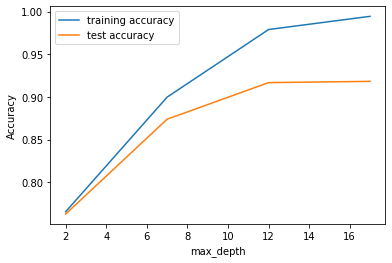

In [247]:
# plotting our accuracy with 'max_depth'
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [248]:
# tuning in 'n_estimators'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score= True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [249]:
score = rf_with_pca.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.911805,0.129676,0.073193,0.012829,2,{'max_depth': 2},0.751727,0.768406,0.766738,0.766500,0.760543,0.762783,0.006137,4,0.771920,0.769002,0.768942,0.764058,0.753276,0.765440,0.006585
1,9.900400,0.256887,0.086583,0.004628,7,{'max_depth': 7},0.875625,0.868239,0.883488,0.870384,0.872051,0.873958,0.005343,3,0.903383,0.901954,0.900405,0.894091,0.899333,0.899833,0.003183
2,12.781245,0.489140,0.108820,0.007697,12,{'max_depth': 12},0.912318,0.917322,0.919466,0.917560,0.917560,0.916845,0.002392,2,0.978914,0.978556,0.980343,0.977543,0.980164,0.979104,0.001042
3,11.843804,0.776340,0.099905,0.008686,17,{'max_depth': 17},0.913033,0.919705,0.918513,0.920658,0.919705,0.918323,0.002731,1,0.994520,0.994996,0.994341,0.993805,0.995175,0.994568,0.000487


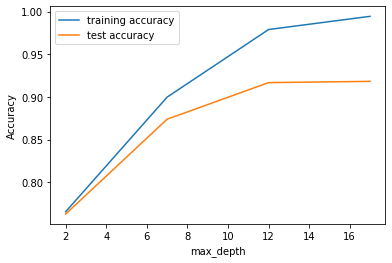

In [250]:
# plotting 
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [251]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score= True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [252]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.052221,0.089878,0.106890,0.004322,100,{'n_estimators': 100},0.902073,0.905647,0.914224,0.911842,0.912080,0.909173,0.004559,4,0.960031,0.962473,0.960329,0.958780,0.960031,0.960329,0.001198
1,58.246067,0.946483,0.504078,0.022862,500,{'n_estimators': 500},0.903026,0.906123,0.915416,0.911842,0.912557,0.909793,0.004532,3,0.962175,0.961401,0.962592,0.959257,0.962533,0.961592,0.001242
2,100.039294,1.448925,0.873156,0.010179,900,{'n_estimators': 900},0.904932,0.908268,0.915892,0.913271,0.913271,0.911127,0.003961,1,0.961997,0.961818,0.961937,0.959435,0.962414,0.961520,0.001062
3,140.368012,15.226841,1.095361,0.151006,1300,{'n_estimators': 1300},0.903741,0.906600,0.916845,0.912557,0.914463,0.910841,0.004909,2,0.962414,0.962890,0.962711,0.959257,0.962771,0.962009,0.001385


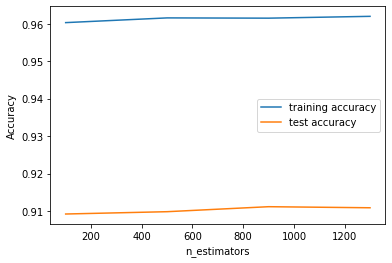

In [254]:
# plots
plt.figure()
plt.plot(score["param_n_estimators"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_n_estimators"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [255]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score= True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [256]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.426179,0.440127,0.116305,0.013681,4,{'max_features': 4},0.903503,0.907076,0.915416,0.909221,0.910889,0.909221,0.003961,1,0.959852,0.960448,0.961163,0.955087,0.960269,0.959364,0.002180
1,14.187325,0.098324,0.099865,0.005868,8,{'max_features': 8},0.903979,0.903026,0.916369,0.907553,0.910412,0.908268,0.004829,2,0.959495,0.962473,0.963724,0.957708,0.962056,0.961091,0.002180
2,23.656833,0.121215,0.095648,0.003938,14,{'max_features': 14},0.899690,0.902311,0.913986,0.904217,0.908268,0.905695,0.005001,3,0.961282,0.961461,0.962473,0.957589,0.961937,0.960948,0.001730
3,33.104863,0.164546,0.093408,0.001430,20,{'max_features': 20},0.899452,0.900405,0.913271,0.908268,0.906838,0.905647,0.005143,4,0.959495,0.960686,0.960984,0.956993,0.960269,0.959685,0.001436
4,36.298164,2.951068,0.082720,0.011618,24,{'max_features': 24},0.898499,0.895878,0.909697,0.909697,0.905885,0.903931,0.005739,5,0.959495,0.959078,0.960746,0.958125,0.959495,0.959388,0.000844


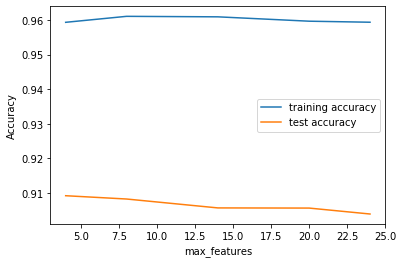

In [257]:
# plot 8 to 10
plt.figure()
plt.plot(score["param_max_features"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_max_features"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [258]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score= True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [259]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.643059,0.045651,0.087265,0.003248,100,{'min_samples_leaf': 100},0.849893,0.846081,0.863950,0.849893,0.856088,0.853181,0.006269,1,0.872826,0.868477,0.869311,0.868894,0.870503,0.870002,0.001565
1,7.973553,0.041797,0.084151,0.002059,150,{'min_samples_leaf': 150},0.841077,0.829640,0.837265,0.833214,0.838218,0.835883,0.004011,2,0.856862,0.850548,0.849059,0.849714,0.847808,0.850798,0.003161
2,7.377687,0.050947,0.079409,0.002511,200,{'min_samples_leaf': 200},0.831070,0.824398,0.830832,0.832499,0.831070,0.829974,0.002850,3,0.843519,0.842328,0.840600,0.840243,0.841553,0.841649,0.001187
3,7.025732,0.085543,0.079196,0.002856,250,{'min_samples_leaf': 250},0.823684,0.816774,0.818680,0.824160,0.819633,0.820586,0.002879,4,0.835716,0.833691,0.826483,0.827138,0.828747,0.830355,0.003682
4,6.689008,0.062327,0.079765,0.004153,300,{'min_samples_leaf': 300},0.805099,0.808673,0.817489,0.809149,0.819871,0.812056,0.005637,5,0.821718,0.822075,0.822194,0.815463,0.821837,0.820658,0.002603


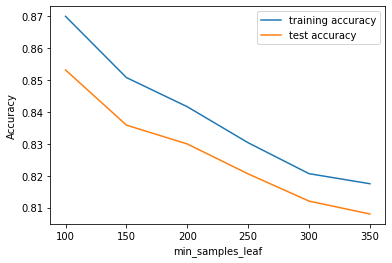

In [260]:
# plot 100 to 150
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [261]:
# min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True )
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [262]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.540262,0.096394,0.062299,0.001070,200,{'min_samples_split': 200},0.875625,0.871098,0.888015,0.874672,0.878723,0.877627,0.005735,1,0.905468,0.902966,0.903979,0.901596,0.902966,0.903395,0.001284
1,6.283505,0.063028,0.061910,0.002445,250,{'min_samples_split': 250},0.862044,0.864665,0.875387,0.859662,0.865142,0.865380,0.005377,2,0.885037,0.891649,0.887539,0.884918,0.887420,0.887312,0.002440
2,6.132783,0.074725,0.057930,0.000619,300,{'min_samples_split': 300},0.854658,0.851084,0.863950,0.851561,0.863712,0.856993,0.005717,3,0.878663,0.880927,0.876340,0.876459,0.881106,0.878699,0.002066
3,6.023885,0.141412,0.065249,0.008869,350,{'min_samples_split': 350},0.850846,0.844889,0.858947,0.851561,0.854658,0.852180,0.004631,4,0.870145,0.869669,0.868299,0.867524,0.867822,0.868692,0.001034
4,5.753568,0.019756,0.055261,0.000388,400,{'min_samples_split': 400},0.847987,0.844651,0.850369,0.842030,0.846319,0.846271,0.002841,5,0.866214,0.861210,0.862759,0.858649,0.865380,0.862843,0.002759


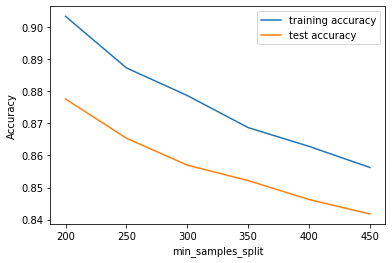

In [263]:
# pltting 200 to 300
plt.figure()
plt.plot(score["param_min_samples_split"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_min_samples_split"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [264]:
# creating param_grid
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}

# based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate 
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score', cv = 5, n_jobs=-1, verbose = 1)

In [265]:
# fitting
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [266]:
# accuracy
grid_search.best_score_

0.853180843459614

In [267]:
# params
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [268]:
# model with teh hyperparams
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             max_features=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=300)

In [269]:
# fitting
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [270]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [271]:
# classification report
classification_report(y_test,y_pred_default)

'              precision    recall  f1-score   support\n\n           0       0.97      0.87      0.92      8179\n           1       0.35      0.68      0.46       815\n\n    accuracy                           0.86      8994\n   macro avg       0.66      0.78      0.69      8994\nweighted avg       0.91      0.86      0.88      8994\n'

In [272]:
# confsuion matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7148, 1031],
       [ 257,  558]], dtype=int64)

In [273]:
TN = confusion_rf_hyper[0,0] 
TP = confusion_rf_hyper[1,1] 
FP = confusion_rf_hyper[0,1] 
FN = confusion_rf_hyper[1,0] 

In [274]:
# accuracy
accuracy_score(y_test,y_pred_default)

0.8567934178341117

In [275]:
# sesitivity
TP / float(TP+FN)

0.6846625766871166

In [276]:
# specificity
TN / float(TN+FP)

0.87394547010637

In [277]:
# positive predictive value
TP / float(TP+FP)

0.35116425424795467

In [278]:
# false positive rate
FP/ float(TN+FP)

0.12605452989363003

In [279]:
# negative predicted value
TN / float(TN+ FN)

0.9652937204591492

In [280]:
# misclassification rate
(FN+FP)/(TP+TN+FP+FN)

0.14320658216588836

In [281]:
# now runnign Random Forest on all feartures

In [282]:
rfc = RandomForestClassifier(class_weight='balanced')

In [283]:
#fit
rfc.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced')

In [284]:
# predit
predictions = rfc.predict(X_test)

In [285]:
# claclassification report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.97      8179\n           1       0.78      0.39      0.52       815\n\n    accuracy                           0.93      8994\n   macro avg       0.86      0.69      0.74      8994\nweighted avg       0.93      0.93      0.92      8994\n'

In [287]:
# confusion matrix
confusion_matrix(y_test,predictions)

array([[8087,   92],
       [ 494,  321]], dtype=int64)

In [288]:
# accuracy score
accuracy_score(y_test,predictions)

0.9348454525239048

In [289]:
# confusion matrix
confusion_rf_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_all_feature

array([[8087,   92],
       [ 494,  321]], dtype=int64)

In [290]:
TN = confusion_rf_all_feature[0,0] 
TP = confusion_rf_all_feature[1,1] 
FP = confusion_rf_all_feature[0,1] 
FN = confusion_rf_all_feature[1,0] 

In [292]:
# accuracy
accuracy_score(y_test,predictions)

0.9348454525239048

In [293]:
# sensititvity
TP / float(TP+FN)

0.39386503067484663

In [294]:
# specificity
TN / float(TN+FP)

0.988751681134613

In [295]:
# false postitve rate
FP/ float(TN+FP)

0.011248318865386967

In [296]:
# postive predicted value
FP/ float(TN+FP)

0.011248318865386967

In [297]:
# negative predicted value
TN / float(TN+ FN)

0.9424309521034845

In [298]:
# misscalisfication rate
(FN+FP)/(TP+TN+FP+FN)

0.06515454747609517

In [299]:
# hyper parameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(2, 20, 5)}

# instantiate 
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  n_jobs=-1,
                 return_train_score = True)

In [300]:
# fit
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [301]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.070005,0.162194,0.059604,0.002238,2,{'max_depth': 2},0.876340,0.879914,0.884680,0.883488,0.870145,0.878914,0.005266,4,0.881046,0.888909,0.886407,0.878127,0.869788,0.880855,0.006718
1,4.976951,0.155480,0.103969,0.021030,7,{'max_depth': 7},0.903264,0.899929,0.913271,0.916369,0.912318,0.909030,0.006305,3,0.925423,0.920836,0.920062,0.921968,0.922147,0.922087,0.001834
2,7.197093,0.312994,0.125059,0.008284,12,{'max_depth': 12},0.925185,0.927806,0.939004,0.937336,0.933286,0.932523,0.005326,2,0.970336,0.970872,0.969800,0.968668,0.970217,0.969979,0.000739
3,8.087705,0.541448,0.117370,0.023585,17,{'max_depth': 17},0.932094,0.930903,0.941863,0.943055,0.934715,0.936526,0.005013,1,0.986359,0.987789,0.987134,0.986240,0.986002,0.986705,0.000662


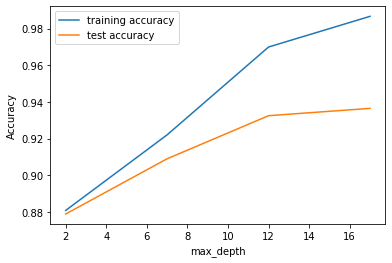

In [302]:
# plotting 10 , 12
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [303]:
# number of folds 
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                  n_jobs=-1, 
                 return_train_score= True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy')

In [304]:
# scores of GridSearch CV
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.072966,0.094363,0.133265,0.019077,100,{'n_estimators': 100},0.922087,0.923517,0.932333,0.932571,0.926853,0.927472,0.004351,2,0.957946,0.955266,0.955623,0.955802,0.954610,0.955849,0.001125
1,33.616025,0.256529,0.542464,0.011782,500,{'n_estimators': 500},0.918990,0.923755,0.934715,0.929473,0.927329,0.926853,0.005298,3,0.958423,0.957589,0.956219,0.954789,0.956874,0.956779,0.001236
2,55.394036,6.628110,0.940482,0.178291,900,{'n_estimators': 900},0.919466,0.923993,0.933524,0.932809,0.928044,0.927567,0.005321,1,0.957946,0.957350,0.956338,0.955921,0.958244,0.957160,0.000899


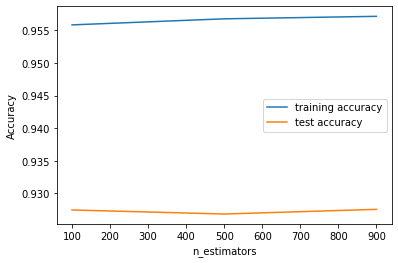

In [307]:
# plot
plt.figure()
plt.plot(score["param_n_estimators"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_n_estimators"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [308]:
# number of folds
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score= True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [309]:
score= rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.348959,0.148561,0.072405,0.010658,4,{'max_features': 4},0.912795,0.923040,0.929235,0.928044,0.922325,0.923088,0.005812,5,0.949547,0.950619,0.948654,0.948296,0.950917,0.949607,0.001037
1,4.329708,0.140893,0.070715,0.004147,8,{'max_features': 8},0.918990,0.922802,0.933047,0.930903,0.925423,0.926233,0.005160,3,0.957648,0.954968,0.953181,0.953777,0.956457,0.955206,0.001657
2,7.049800,0.232445,0.070035,0.012182,14,{'max_features': 14},0.922087,0.922325,0.935430,0.928759,0.927091,0.927138,0.004900,1,0.960210,0.960388,0.959197,0.955802,0.958304,0.958780,0.001667
3,9.821284,0.098036,0.067386,0.004961,20,{'max_features': 20},0.920419,0.922564,0.934477,0.929473,0.928282,0.927043,0.005033,2,0.960031,0.959435,0.961580,0.956874,0.958244,0.959233,0.001595
4,11.690584,0.373358,0.065686,0.005726,24,{'max_features': 24},0.919228,0.921134,0.933047,0.928997,0.927567,0.925995,0.005112,4,0.959614,0.959316,0.958423,0.956517,0.958899,0.958554,0.001095


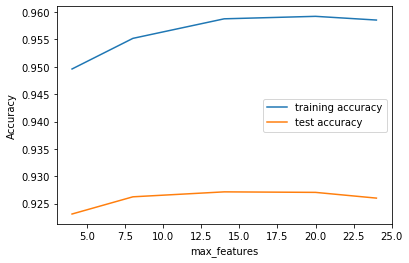

In [310]:
plt.figure()

plt.plot(score["param_max_features"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_max_features"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [317]:
# number of folds
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score= True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [318]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.597681,0.243583,0.058294,0.000395,100,{'min_samples_leaf': 100},0.878485,0.884203,0.884918,0.888968,0.890874,0.885490,0.004293,1,0.895401,0.896057,0.887837,0.893317,0.891351,0.892792,0.002979
1,3.106605,0.088661,0.058059,0.004635,150,{'min_samples_leaf': 150},0.879438,0.878485,0.880629,0.884441,0.889921,0.882583,0.004191,2,0.890696,0.890100,0.879378,0.882773,0.887300,0.886050,0.004354
2,2.831908,0.035406,0.053495,0.000458,200,{'min_samples_leaf': 200},0.875864,0.872290,0.878485,0.879199,0.886586,0.878485,0.004720,3,0.887658,0.882297,0.882237,0.879080,0.884680,0.883190,0.002856
3,2.670137,0.027224,0.052591,0.002753,250,{'min_samples_leaf': 250},0.873005,0.873005,0.874434,0.876817,0.884918,0.876436,0.004464,4,0.885990,0.881403,0.879438,0.876162,0.880510,0.880701,0.003185
4,2.599198,0.132171,0.050425,0.000473,300,{'min_samples_leaf': 300},0.870622,0.870384,0.878723,0.878723,0.882059,0.876102,0.004732,5,0.880093,0.878008,0.879914,0.878485,0.877055,0.878711,0.001153


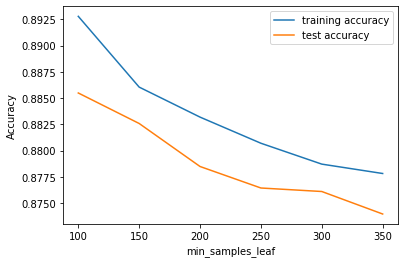

In [319]:
# plot 
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")

plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [320]:
# no of folds
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                return_train_score= True )
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(100, 700, 50)},
             return_train_score=True, scoring='accuracy')

In [321]:
score = rf.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.375996,0.037940,0.067751,0.000616,100,{'min_samples_split': 100},0.906600,0.910412,0.919228,0.918751,0.915178,0.914034,0.004877,1,0.936621,0.934834,0.932630,0.933762,0.935847,0.934739,0.001427
1,4.166885,0.047730,0.064480,0.000833,150,{'min_samples_split': 150},0.898737,0.901120,0.907791,0.910174,0.908744,0.905313,0.004525,2,0.921670,0.921075,0.917441,0.920241,0.920658,0.920217,0.001466
2,4.057899,0.038355,0.062553,0.000408,200,{'min_samples_split': 200},0.896116,0.894925,0.903264,0.906362,0.900167,0.900167,0.004286,3,0.916011,0.912616,0.907851,0.913212,0.912735,0.912485,0.002628
3,4.141779,0.223729,0.070100,0.006779,250,{'min_samples_split': 250},0.888254,0.887539,0.897784,0.900882,0.897546,0.894401,0.005445,4,0.909817,0.907613,0.902966,0.904456,0.905766,0.906123,0.002397
4,4.074520,0.136412,0.076386,0.025264,300,{'min_samples_split': 300},0.887062,0.887062,0.893257,0.896593,0.896116,0.892018,0.004204,5,0.908030,0.903919,0.895282,0.898142,0.902549,0.901584,0.004461


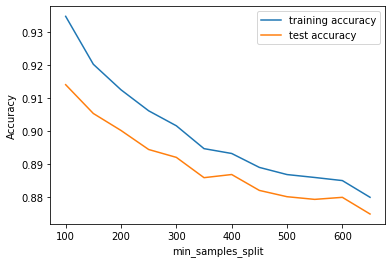

In [322]:
# min_samples_split
plt.figure()
plt.plot(score["param_min_samples_split"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_split"], 
         score["mean_test_score"], 
         label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# creating 'param_grid'
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [324]:
# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'max_features': [15, 20],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [300, 400, 500]},
             refit='recall_score', verbose=1)

In [325]:
# accuracy
grid_search.best_score_

0.8752442220633786

In [326]:
# best paramas
grid_search.best_params_

{'max_depth': 10,
 'max_features': 15,
 'min_samples_leaf': 150,
 'min_samples_split': 300,
 'n_estimators': 300}

In [327]:
# modelling with best hyperparams
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             max_features=15,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             n_estimators=500)

In [328]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=150, min_samples_split=300,
                       n_estimators=500)

In [329]:
# predictions
predictions = rfc_final.predict(X_test)

In [330]:
# confusion matrix
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7163, 1016],
       [ 139,  676]], dtype=int64)

In [331]:
TN = confusion_rm_f[0,0] 
TP = confusion_rm_f[1,1] 
FP = confusion_rm_f[0,1] 
FN = confusion_rm_f[1,0] 

In [332]:
# accuracy score
accuracy_score(y_test,predictions)

0.871581054036024

In [333]:
# sensitivity
TP / float(TP+FN)

0.8294478527607362

In [334]:
# specificity
TN / float(TN+FP)

0.87577943513877

In [335]:
# false pos rate
FP/ float(TN+FP)

0.12422056486122998

In [337]:
# positive pred value
TP / float(TP+FP)

0.39952718676122934

In [338]:
# negative predicitive value
TN / float(TN+ FN)

0.9809641194193371

In [339]:
# missscalssification
(FN+FP)/(TP+TN+FP+FN)

0.128418945963976

In [340]:
# important features only
from collections import OrderedDict

feature_names=list(X_train.columns.values)

# empty dict
important_features_dict = {}

# iterating
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance

# descending
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [341]:
telecom_1.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2

In [342]:
# focsuing only on top 30 variables
dic = dict(d_descending)
from itertools import islice

def take(n, iterable):
    return list(islice(iterable, n))

In [343]:
n_items = take(12, dic.items())

In [344]:
n_items

[('arpu_8', 0.2498301266061844),
 ('last_day_rch_amt_8', 0.1742016421061162),
 ('roam_ic_mou_8', 0.1383044180050486),
 ('max_rech_amt_8', 0.13052686668918068),
 ('date_of_last_rech_8', 0.07572992041543737),
 ('vol_2g_mb_8', 0.031080680340216382),
 ('spl_og_mou_8', 0.027786180655621648),
 ('std_ic_t2f_mou_8', 0.017129182069899645),
 ('roam_ic_mou_7', 0.012618499785373055),
 ('loc_ic_t2f_mou_6', 0.011222049863344777),
 ('loc_og_t2f_mou_6', 0.011033333424119274),
 ('ic_others_8', 0.009867178891724967)]

In [345]:
# for top 12 features
imp = rfc_final.feature_importances_
names = X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

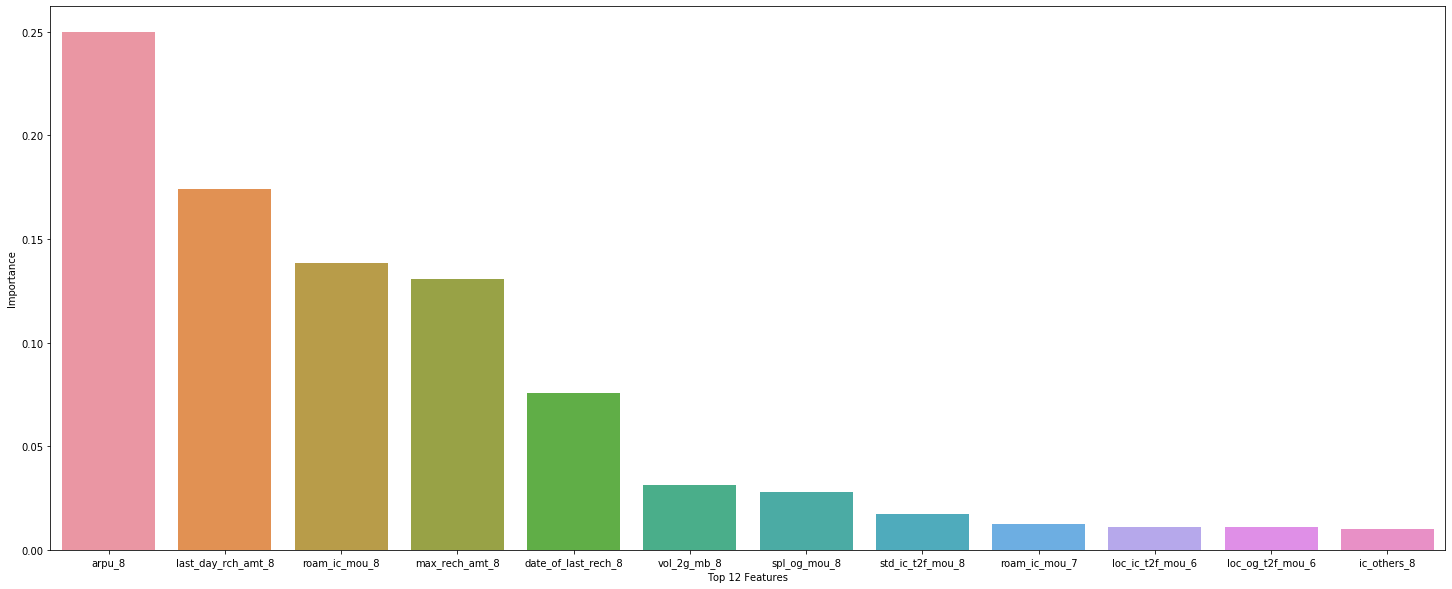

In [348]:
df_1 = pd.DataFrame({"Variable":names,
                     "importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)

# plotting
plt.figure(figsize=(25, 10))
plotting = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
plotting.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

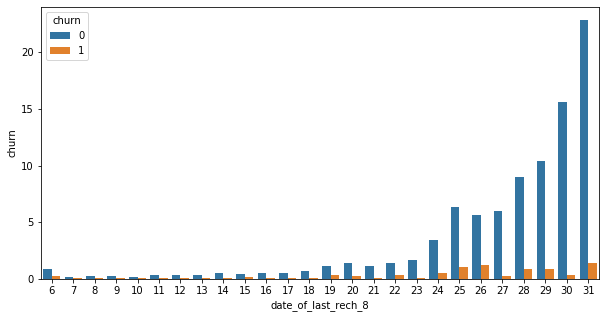

In [352]:
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_1,estimator=lambda x: len(x) / len(telecom_1) * 100)
plt.show()

Insights & Recommendations
- Major chunk of the Users churned between 25th to 31st of the month, so eventually offers prior to 25th can reduce the churn. also, consider sending out periodic offers. - if possible, customized offers
- Average Revenue Per User gradually decreases from 6th to 7th to 8th month as most of the users would churned by 8th month
- Lower the last day recharge amount, higher the churn rate. Keep an eye on decreasing amts of last day recharge
- Keep a tab on customrs who have decreased their avg max recharge amt
- People with higher roaming usage, both STD & ISD - should be offered special roaming packages